In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def transform(pixel, gamma):
    norm = pixel/255.0
    return np.clip((norm**gamma)*255.0, 0, 255)



In [10]:

def correct_image(image_path, gamma):
    img = cv2.imread(image_path)

    lookup = np.empty((1, 256), np.uint8)


    for i in range(256):
        lookup[0, i] = transform(i, gamma)

    out = cv2.LUT(img, lookup)



    plt.figure(figsize=[15, 5])
    plt.subplot(121)
    plt.imshow(img[..., ::-1]) 
    plt.title("Original")
    plt.subplot(122)
    plt.imshow(out[..., ::-1])
    plt.title("Gamma Corrected")
    plt.show()

    return out

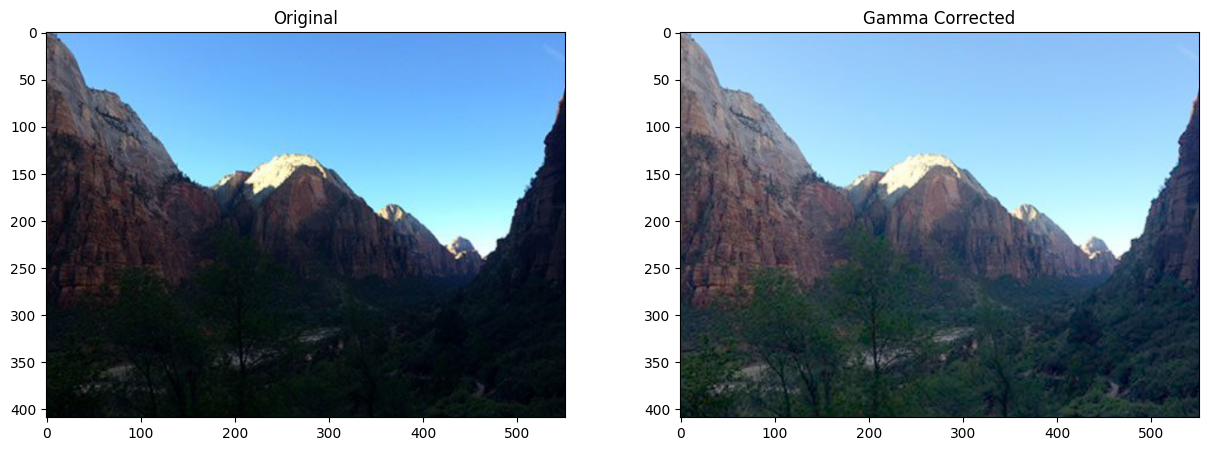

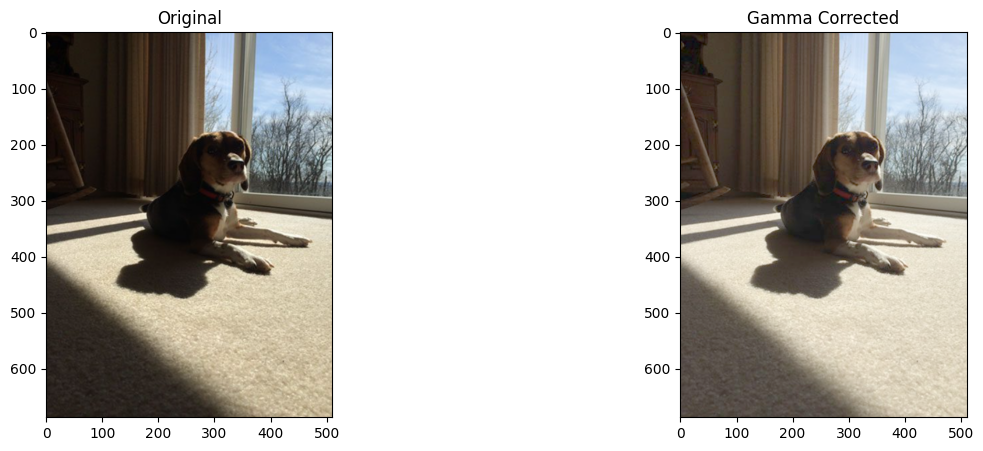

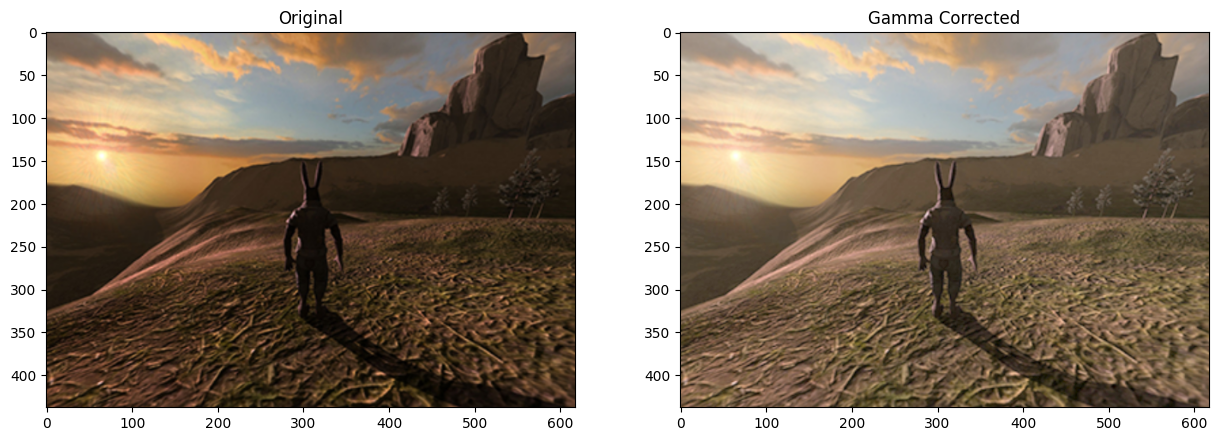

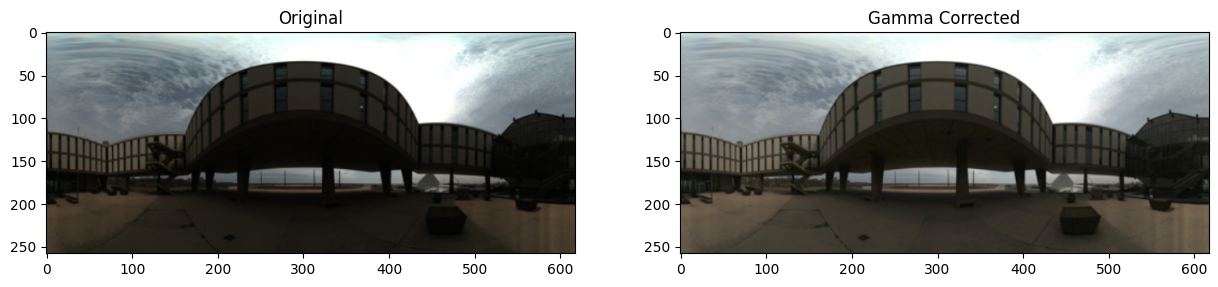

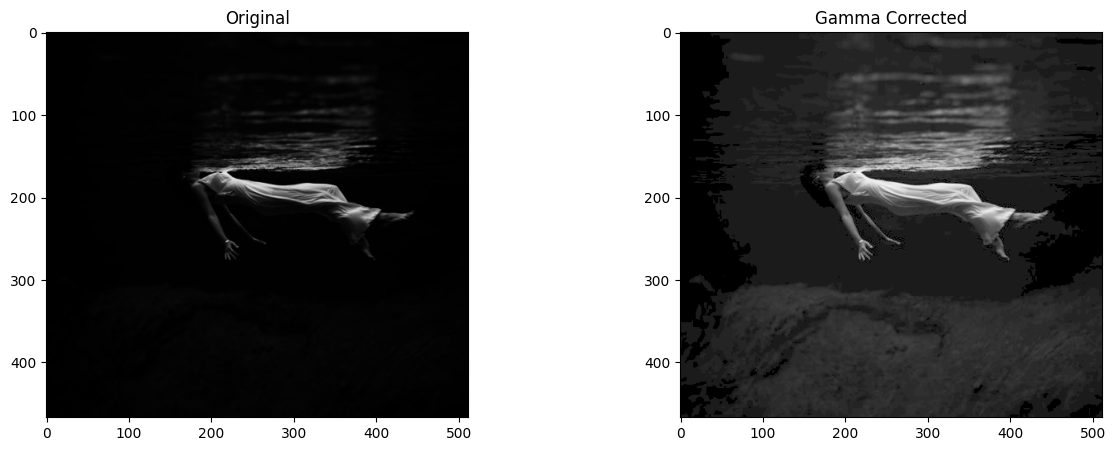

In [26]:
res1 = correct_image('1.png', 0.6)
res2 = correct_image('2.png', 0.6)
res3 = correct_image('3.png', 0.6)
res4 = correct_image('4.png', 0.7)
res5 = correct_image('5.jpg', 0.4)

for i, r in enumerate([res1, res2, res3, res4, res5]):
    cv2.imwrite(f"{i+1}_corrected.png", r)

